In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

c:\Users\beatr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [47]:
simulation_mean_df = pd.read_json('RESULTS_case_study.json')
simulation_mean_df = simulation_mean_df.iloc[2:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()

Number of rows: 4
Number of columns: 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2,6016.848105,5409.893903,5509.159568,5608.469661,5870.900682,5285.560897,5757.448129,5896.093825,5176.999482,4907.156328,...,5368.115337,5422.450101,6224.479463,5801.540224,5583.312460,5411.771419,5403.404685,5637.621833,5158.204601,5698.375607
3,2873.416717,2632.582733,2931.537173,2851.221458,2887.451474,2874.374285,2887.985163,2837.281068,2907.160499,2711.857548,...,2769.555640,2707.687926,2795.283016,2991.550521,2871.516571,2959.691546,3083.582319,2710.041246,2729.496540,2676.510696
4,2016.979397,1878.361432,1908.681194,1812.828149,1919.068422,1905.598374,2055.436128,1872.219976,2025.013980,1865.581241,...,2034.695570,1940.398618,1891.281148,2076.534412,1895.379272,1946.282724,1754.613140,1959.117632,2050.825105,1860.799210
5,1498.062818,1425.880368,1529.688872,1445.252059,1462.670620,1484.208272,1440.210403,1530.074706,1540.703813,1503.371658,...,1448.690266,1540.373588,1371.383735,1522.316354,1421.745188,1567.949019,1491.787863,1391.335790,1435.540426,1371.906903


In [48]:
# for row in simulation_mean_df: 
#     server = simulation_mean_df[row]
#     row_mean = server.mean()
#     print("For row: ", row, " Mean: ", row_mean)


# row_mean = simulation_mean_df.mean(axis=1)
# row_max = simulation_mean_df.max(axis=1)
# row_min = simulation_mean_df.min(axis=1)


# print("Row Mean:", row_mean)
# print("Row Max:", row_max)
# print("Row Min:", row_min)

for index, row in simulation_mean_df.iterrows():
    # Calculate the mean of the current row
    row_mean = row.mean()
    row_max = row.max()
    row_min = row.min()
    # Print the result
    print("For row:", index, "Mean:", row_mean, "Max:", row_max, "Min:", row_min)

For row: 2 Mean: 5580.324328647588 Max: 6404.9522961485 Min: 4849.3160295262
For row: 3 Mean: 2855.091777038594 Max: 3276.1783570671 Min: 2593.3887097576
For row: 4 Mean: 1944.5661715728734 Max: 2125.3951996268 Min: 1754.6131399818
For row: 5 Mean: 1470.004802144597 Max: 1590.1136657369 Min: 1362.2239243284


In [49]:
df_melted = pd.melt(simulation_mean_df, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
 # this switches the x-axis labels to strat from 1 instead of 0

print(df_melted)

print(df_melted.index)

    variable  Average Waiting Time
2          0           6016.848105
3          0           2873.416717
4          0           2016.979397
5          0           1498.062818
2          1           5409.893903
..       ...                   ...
5         98           1435.540426
2         99           5698.375607
3         99           2676.510696
4         99           1860.799210
5         99           1371.906903

[400 rows x 2 columns]
Index([2, 3, 4, 5, 2, 3, 4, 5, 2, 3,
       ...
       4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
      dtype='int64', length=400)


In [4]:
df_melted.index = df_melted.index + 1
# to switch the start on the axis to 1 instead of zero, only run ONCE

In [50]:
stats_per_server = df_melted.groupby('variable')['Average Waiting Time'].agg(['mean', 'max', 'min']).reset_index()

print(stats_per_server)

    variable         mean          max          min
0          0  3101.326759  6016.848105  1498.062818
1          1  2836.679609  5409.893903  1425.880368
2          2  2969.766702  5509.159568  1529.688872
3          3  2929.442832  5608.469661  1445.252059
4          4  3035.022799  5870.900682  1462.670620
..       ...          ...          ...          ...
95        95  2971.423677  5411.771419  1567.949019
96        96  2933.347002  5403.404685  1491.787863
97        97  2924.529125  5637.621833  1391.335790
98        98  2843.516668  5158.204601  1435.540426
99        99  2901.898104  5698.375607  1371.906903

[100 rows x 4 columns]


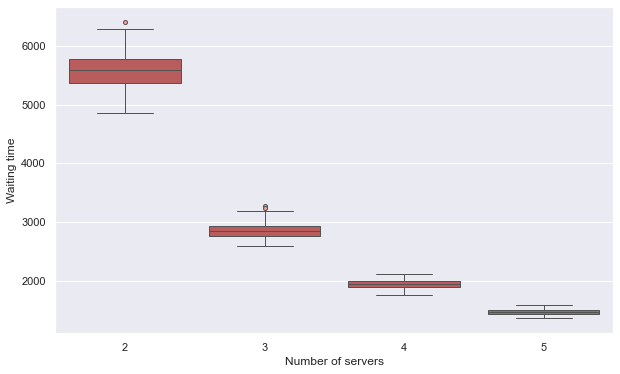

In [51]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))
# Annotate boxplot with mean, max, and min values for each server

#plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")

plt.show()

# for row in simulation_mean_df.index:
#     print(np.mean(simulation_mean_df.iloc[row]))

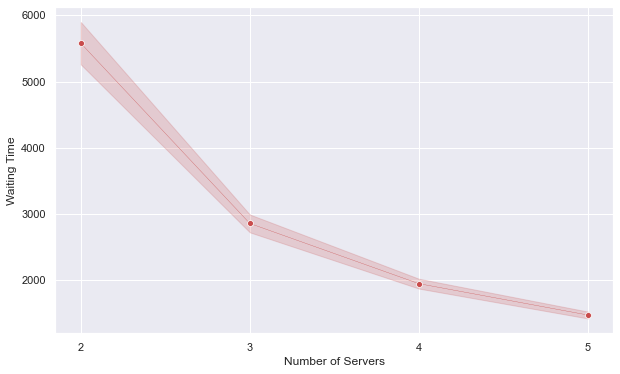

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd", linewidth=0.3, color="#c94c4c")
#plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time")
plt.xticks(np.arange(2, 6, 1))
plt.show()

<Figure size 720x504 with 0 Axes>

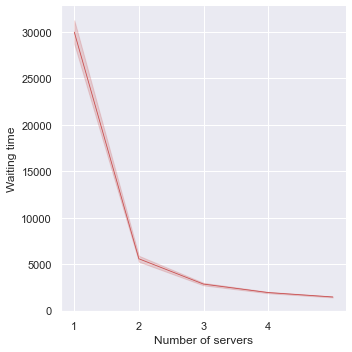

In [18]:
plt.figure(figsize=(10, 7))
sns.relplot(x=df_melted.index, y="Average Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c", linewidth=0.8) #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

#plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")
plt.xticks(np.arange(1, 5, 1))
plt.show()